# Predict Fraud Status of Customers

> Dataset 1: **customer_transaction_details.csv**

**Purpose:** Contains detailed information about customer transactions.

**Key Columns:**
**customerEmail**,
transactionId,
orderId,
paymentMethodId,
paymentMethodRegistrationFailure,
paymentMethodType,
paymentMethodProvider,
transactionAmount,
transactionFailed,
orderState

> Dataset 2: **customers_df.csv**

**Purpose:** Provides additional information about customers.

**Key Columns:**
**customerEmail**,
customerPhone,
customerDevice,
customerIPAddress,
customerBillingAddress,
No_Transactions,
No_Orders,
No_Payments,
Fraud,
customerPhone


Note : Both datasets are linked thorugh customeremail column.


In [23]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('customer_transaction_details.csv')
df2 = pd.read_csv('customers_df.csv')


In [24]:
df1.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [26]:
df1.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [27]:
df2.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [29]:
df2.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


# Exploratory Data Analysis

# A) Customers_df



In [30]:
df2.nunique()

,0
Unnamed: 0,168
customerEmail,161
customerPhone,168
customerDevice,168
customerIPAddress,165
customerBillingAddress,166
No_Transactions,13
No_Orders,9
No_Payments,11
Fraud,2




*   In this dataset, email address is unique for each customer.
*   There are total 168 rows in d2  and we have 161 unique email addresses so 7 of them must be repeated.



In [31]:
df2[df2.duplicated(subset=['customerEmail'],keep=False)]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
40,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


This email address appears 8 times in the dataset and all transactions made form this email is fraud.



---
Let's analyze numerical features
1. No_Transactions
2. No_Orders
3. No_Payments

We can conclude that - Transactions and orders have a degree of correlation, but payments are independent

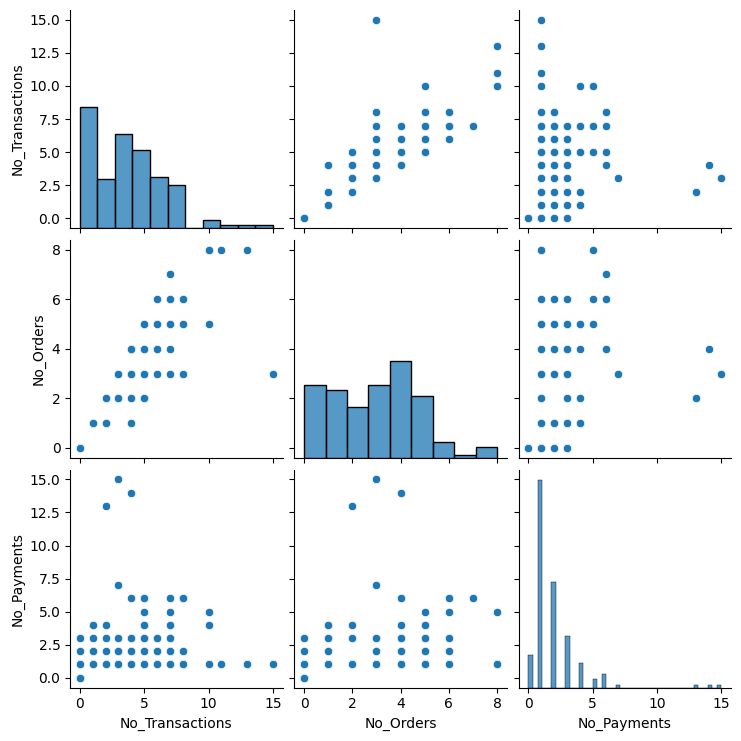

In [35]:
sns.pairplot(df2[['No_Transactions','No_Orders','No_Payments']])

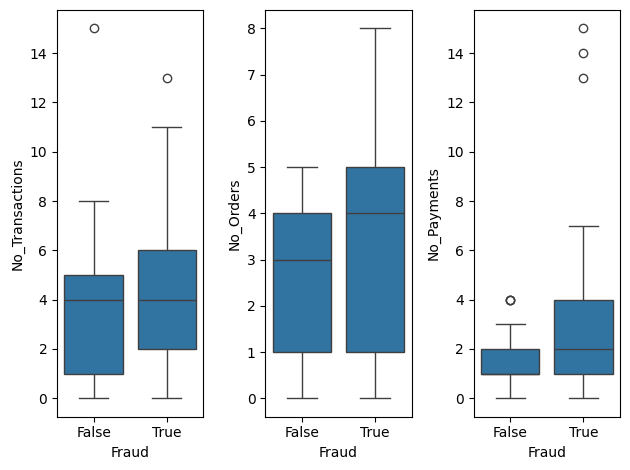

In [37]:
fig, ax =plt.subplots(1,3)
sns.boxplot(x="Fraud", y="No_Transactions", data=df2, ax=ax[0])
sns.boxplot(x="Fraud", y="No_Orders", data=df2, ax=ax[1])
sns.boxplot(x="Fraud", y="No_Payments", data=df2, ax=ax[2])
fig.tight_layout()

Let's analyze descriptive features

1. Email
2. Phone
3. Device
4. IPAddress
5. BillingAddress

# 1. Email


*   Pattern of email address
*   Domain name


In [40]:
import re

In [41]:
regex = '''(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])'''
df2['valid_email'] = df2['customerEmail'].apply(lambda x: int(bool(re.fullmatch(regex,x))))
df2.groupby('valid_email').count()["Fraud"]

,Fraud
valid_email,
0,4
1,164


<Axes: xlabel='valid_email', ylabel='count'>

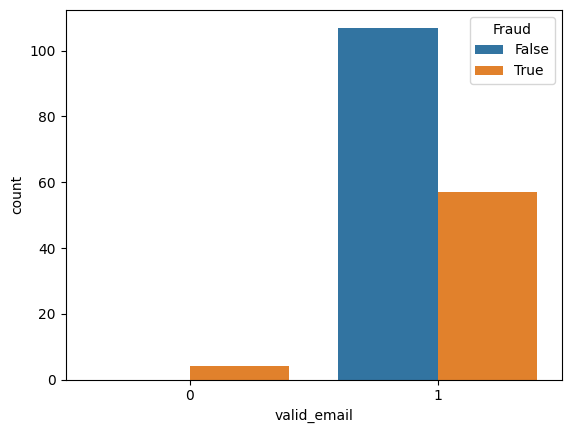

In [43]:
sns.countplot(x='valid_email',hue='Fraud',data=df2)

In [44]:
df2['edomain'] = df2['customerEmail'].apply(lambda x: x.split("@")[1])
df2[["edomain","Fraud"]].groupby("edomain").agg({"Fraud": ['mean', 'count']}).nlargest(20,('Fraud','count'))

Fraud      
                       mean count
edomain                          
gmail.com          0.483871    31
yahoo.com          0.206897    29
hotmail.com        0.260870    23
wright.com         0.333333     3
jones.com          0.500000     2
1jcfcxs7           1.000000     1
6eph               1.000000     1
arnold.com         1.000000     1
atkinson.com       0.000000     1
bell.com           0.000000     1
brewer-jones.com   1.000000     1
brown.com          1.000000     1
chavez.com         0.000000     1
clark.biz          0.000000     1
clark.com          0.000000     1
conner.com         0.000000     1
conrad.net         0.000000     1
cox.org            0.000000     1
cruz.info          0.000000     1
davis-perkins.com  0.000000     1

# 2. Phone Number
It's not useful because country code is not uniformly included.

# 3. Device
This is also not useful because it's not matching with the IMEI format.

# 4. IP Address
The customer's location at the time of the transaction might be detected.

 With the use of IP Address I've extracted the country code.



> Transactions originating from Hong Kong might warrant a closer look due to a higher potential for fraud.

> Conversely, transactions from Japan seem to exhibit a lower fraud risk.






In [45]:
df2['customerIPAddress'][:100].to_csv('ip1.csv',index=False)
df2['customerIPAddress'][100:].to_csv('ip2.csv',index=False)

Extraction process is done thorugh showmyip website and saved the output in "ipcountry.csv" file.

In [46]:
ipcountry= pd.read_csv("ipcountry.csv")
df2['country'] = ipcountry['Country']
df2[["country","Fraud"]].groupby("country").agg({"Fraud": ['mean', 'count']}).nlargest(20,('Fraud','count'))

Fraud      
                    mean count
country                       
Switzerland     0.327586    58
United States   0.303030    33
Unknown         0.230769    13
reserved range  0.333333    12
China           0.300000    10
France          0.428571     7
Hong Kong       1.000000     4
Japan           0.250000     4
Italy           0.333333     3
United Kingdom  0.333333     3
Argentina       1.000000     2
Germany         0.500000     2
Romania         0.500000     2
South Korea     1.000000     2
Taiwan          0.000000     2
Armenia         0.000000     1
Australia       1.000000     1
Canada          1.000000     1
India           1.000000     1
Iran            1.000000     1

# 5. Billing Address

> All customers have billing addresses formatted according to US state and zip code conventions, even though the IP addresses suggest a diverse range of countries.



> But what's the connection between the US-based billing addresses and the various countries represented by the IP addresses?





# B) Customer_transaction_details


In [47]:
df1.nunique()

,0
Unnamed: 0,623
customerEmail,136
transactionId,623
orderId,478
paymentMethodId,237
paymentMethodRegistrationFailure,2
paymentMethodType,4
paymentMethodProvider,10
transactionAmount,67
transactionFailed,2


In [48]:
emailIndex = df2[['customerEmail','Fraud']].drop_duplicates(subset='customerEmail', keep='first', inplace=False)
tran = df1.merge(emailIndex, how='left', on='customerEmail')

In [50]:
display(tran.head())

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,False
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,False
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,True
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,True
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,True


In [51]:
tran = tran.drop(columns=['Unnamed: 0'])

In [52]:
display(tran.head())

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,True
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,True
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,True


<Axes: xlabel='Fraud', ylabel='transactionAmount'>

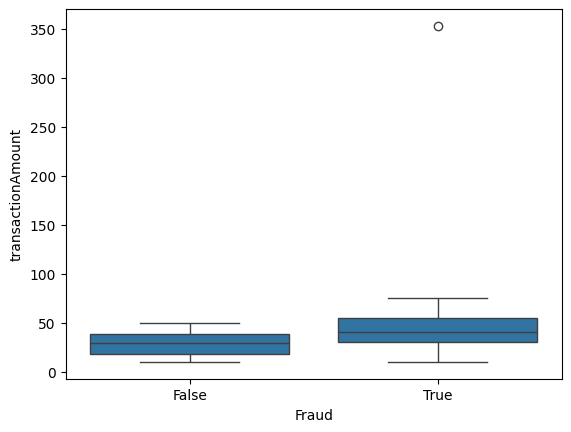

In [53]:
sns.boxplot(x="Fraud", y="transactionAmount", data=tran)

# 1. Transaction Amount
During manual assessment,

*   An outlier is found in row 189, which could potentially skew the results of linear models.
*   Higher transaction amounts are associated with fraud.



<Axes: xlabel='Fraud', ylabel='transactionAmount'>

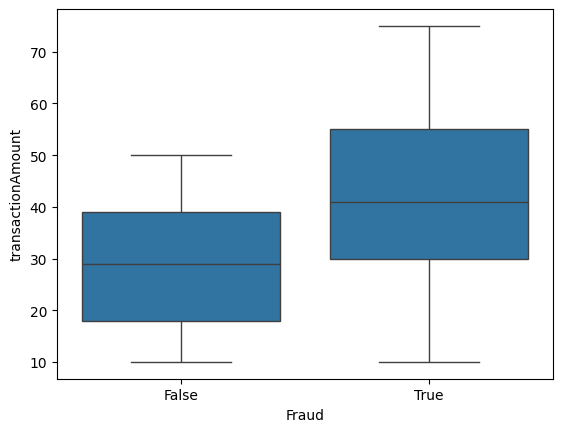

In [55]:
sns.boxplot(x="Fraud", y="transactionAmount", data=tran.drop(189,axis=0))

# 2. TransactionId, OrderId, PaymentMethodId
These are unique values that are not useful

# 3. PaymentMethodRegistrationFailure & TransactionFailed
In these 2 failure features there's seems to be a small correlation - payment method registratino failure positively and transaction failure negatively.


In [61]:
tran[["paymentMethodRegistrationFailure","Fraud"]].groupby("paymentMethodRegistrationFailure").agg({"Fraud": ['mean', 'count']})

Fraud      
                                      mean count
paymentMethodRegistrationFailure                
0                                 0.406654   541
1                                 0.451220    82

In [57]:
tran[["transactionFailed","Fraud"]].groupby("transactionFailed").agg({"Fraud": ['mean', 'count']})

Fraud      
                       mean count
transactionFailed                
0                  0.432967   455
1                  0.357143   168

# 4. PaymentMethodType
Bitcoin turns out to be positively associated with fraud, while Paypal is very low for fraud.

In [58]:
tran[["paymentMethodType","Fraud"]].groupby("paymentMethodType").agg({"Fraud": ['mean', 'count']})

Fraud      
                       mean count
paymentMethodType                
apple pay          0.448980    49
bitcoin            0.510638    47
card               0.423800   479
paypal             0.166667    48

# 5. PaymentMethodProvider
Visa and Voyager tend to be higher for fraud.

In [59]:
tran[["paymentMethodProvider","Fraud"]].groupby("paymentMethodProvider").agg({"Fraud": ['mean', 'count']})

Fraud      
                                 mean count
paymentMethodProvider                      
American Express             0.377778    45
Diners Club / Carte Blanche  0.344828    58
Discover                     0.414634    41
JCB 15 digit                 0.311111    45
JCB 16 digit                 0.432203   118
Maestro                      0.231884    69
Mastercard                   0.375000    32
VISA 13 digit                0.568966    58
VISA 16 digit                0.468750    96
Voyager                      0.524590    61

# 6. OrderState
It seems that pending orders are less likely to be fraudulent than failed or fulfilled orders.

In [60]:
tran[["orderState","Fraud"]].groupby("orderState").agg({"Fraud": ['mean', 'count']})

Fraud      
                mean count
orderState                
failed      0.428571    63
fulfilled   0.422481   516
pending     0.272727    44